Assignment Task:

Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.


1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [1]:
# Ravi Kiran Mahoorkar
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Rading file
df=pd.read_csv("ToyotaCorolla - MLR.csv")

In [3]:
#Contents of file
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [4]:
#Checking for null values
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [5]:
#getting info of data like null count and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


summary statistics of the variables

In [6]:
#describing data
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [7]:
#checking for duplicate values
df.duplicated().sum()
#dropping duplicate values
df.drop_duplicates(inplace=True)

In [8]:
#shape of dataset
df.shape

(1435, 11)

In [9]:
#removing outliers except # "Price" # as it is our target variable
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  # Update df in each iteration
    return df

# Apply the function
df1 = remove_outliers(df, ['Age_08_04', 'KM', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'])

In [10]:
df1.shape

(1149, 11)

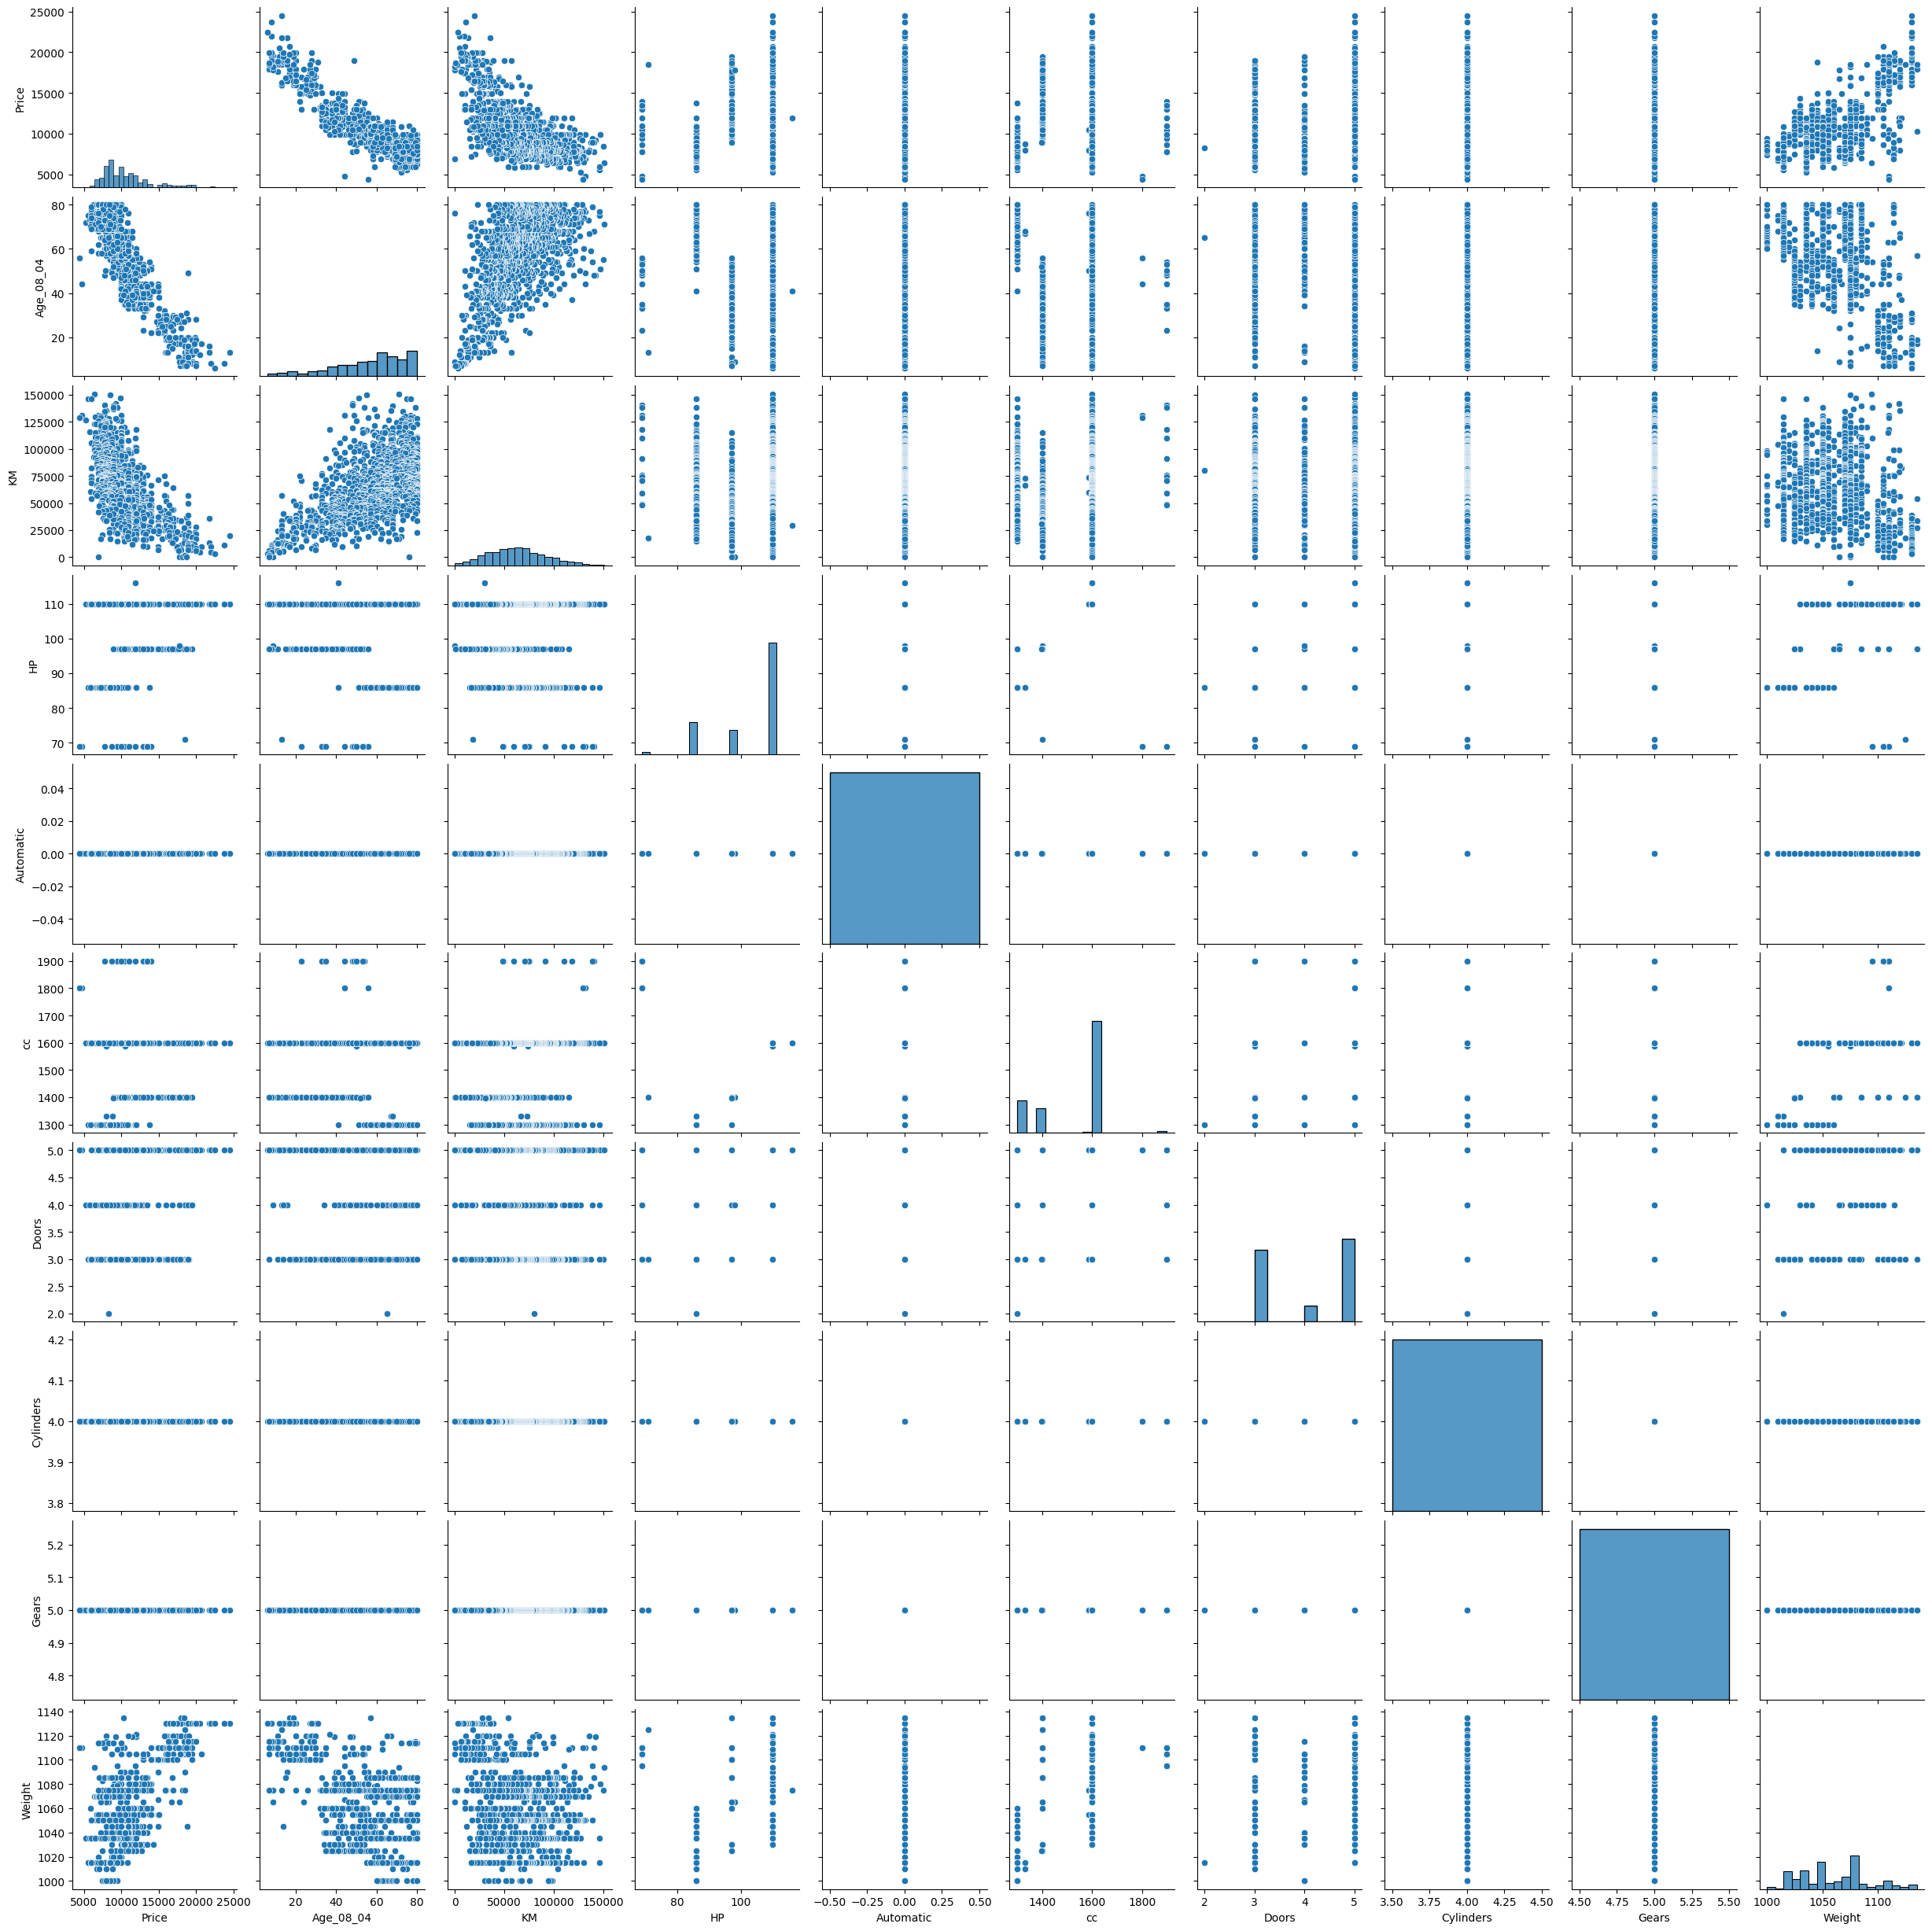

In [11]:
# Creatting the pair plot
sns.pairplot(df1)
plt.show()

In [12]:
# Creating dummy variables for categorical features
dff = pd.get_dummies(df1, columns=['Fuel_Type'], drop_first=True)
#converting true and false into 1 and 0
dff = dff.replace({True: 1, False: 0})
dff

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
9,12950,23,71138,69,0,1900,3,4,5,1105,1,0
17,17950,24,21716,110,0,1600,3,4,5,1105,0,1
18,16750,24,25563,110,0,1600,3,4,5,1065,0,1
19,16950,30,64359,110,0,1600,3,4,5,1105,0,1
20,15950,30,67660,110,0,1600,3,4,5,1105,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,1


In [13]:
# Reset the index of the DataFrame
dff = dff.reset_index(drop=True)

In [14]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149 entries, 0 to 1148
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Price             1149 non-null   int64
 1   Age_08_04         1149 non-null   int64
 2   KM                1149 non-null   int64
 3   HP                1149 non-null   int64
 4   Automatic         1149 non-null   int64
 5   cc                1149 non-null   int64
 6   Doors             1149 non-null   int64
 7   Cylinders         1149 non-null   int64
 8   Gears             1149 non-null   int64
 9   Weight            1149 non-null   int64
 10  Fuel_Type_Diesel  1149 non-null   int64
 11  Fuel_Type_Petrol  1149 non-null   int64
dtypes: int64(12)
memory usage: 107.8 KB


In [15]:
dff.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.895375,-0.622668,0.161440,NaN,0.134823,0.204283,NaN,NaN,0.624329,-0.004664,0.015016
Age_08_04,-0.895375,1.000000,0.583868,-0.057861,NaN,-0.078534,-0.137510,NaN,NaN,-0.523190,-0.087052,0.069193
KM,-0.622668,0.583868,1.000000,-0.036073,NaN,0.068345,-0.044518,NaN,NaN,-0.230134,0.116048,-0.204878
HP,0.161440,-0.057861,-0.036073,1.000000,NaN,0.760903,0.221720,NaN,NaN,0.434551,-0.366726,0.215740
Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,0.134823,-0.078534,0.068345,0.760903,NaN,1.000000,0.199118,NaN,NaN,0.544102,0.312862,-0.273286
Doors,0.204283,-0.137510,-0.044518,0.221720,NaN,0.199118,1.000000,NaN,NaN,0.514281,-0.032665,0.010653
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,0.624329,-0.523190,-0.230134,0.434551,NaN,0.544102,0.514281,NaN,NaN,1.000000,0.170803,-0.221856


Pre Processing

In [16]:
#importing preprocessing
from sklearn import preprocessing
# Select numerical features for standardization
numerical_cols = dff.select_dtypes(include=np.number).columns.tolist()

if 'Price' in numerical_cols: # Exclude 'Price' if it's your target variable
    numerical_cols.remove('Price')

# Initialize the scaler
scaler = preprocessing.StandardScaler()

# Fit and transform the numerical features
dff[numerical_cols] = scaler.fit_transform(dff[numerical_cols])

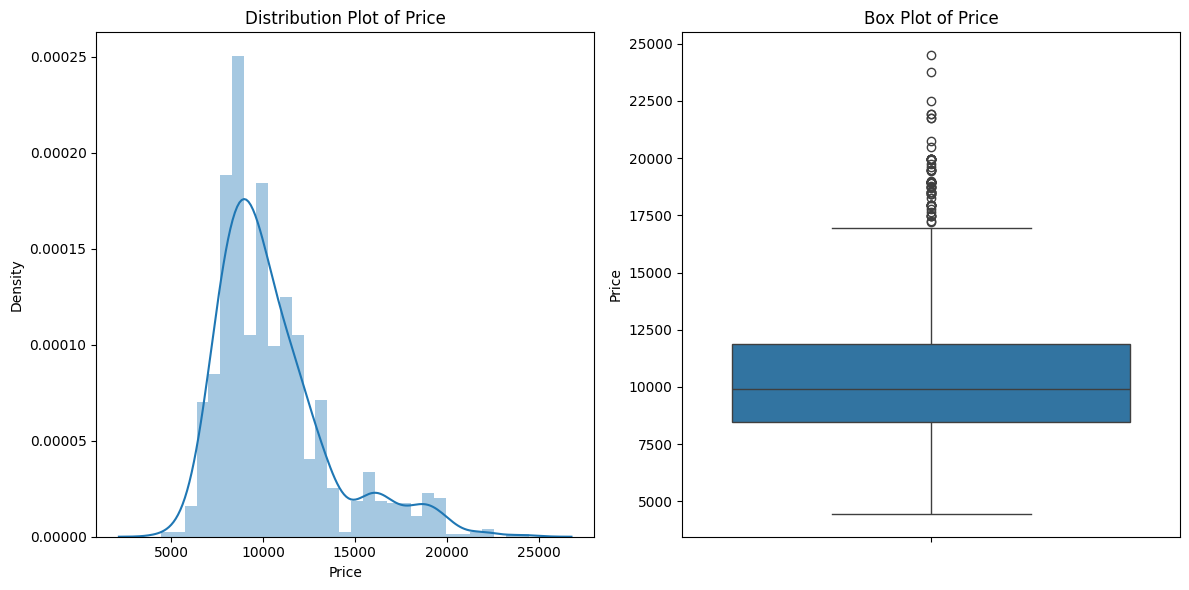

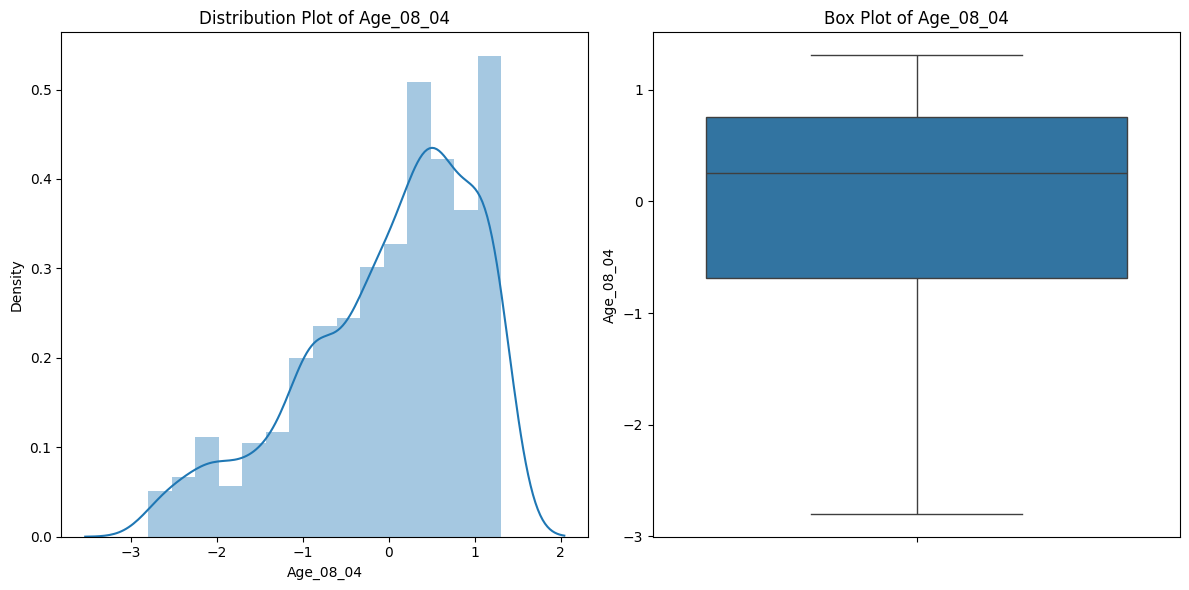

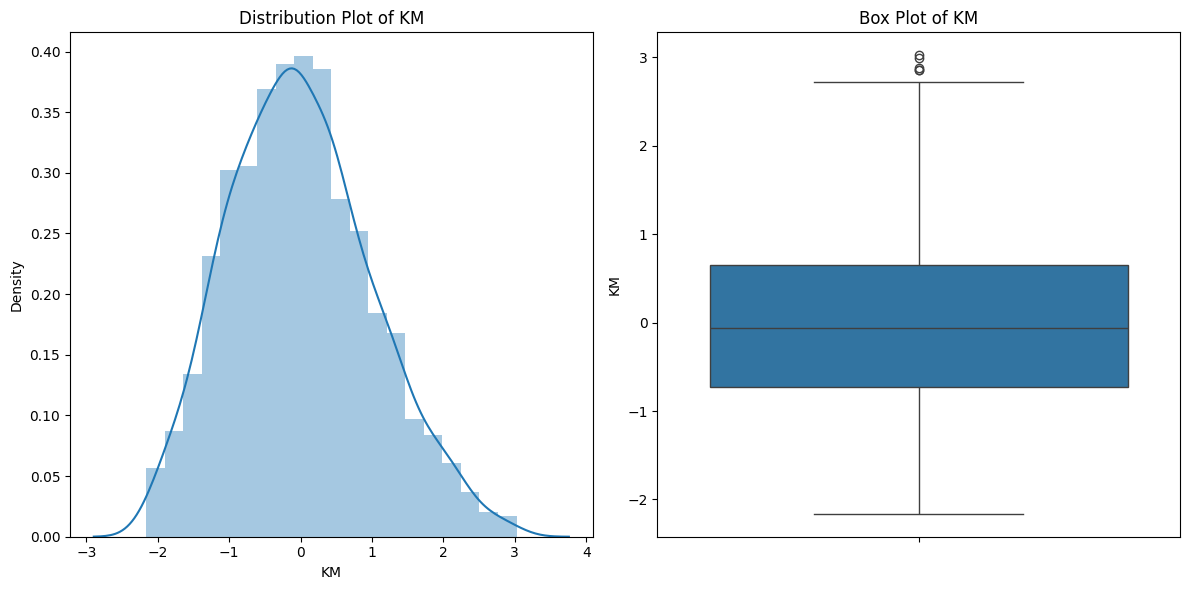

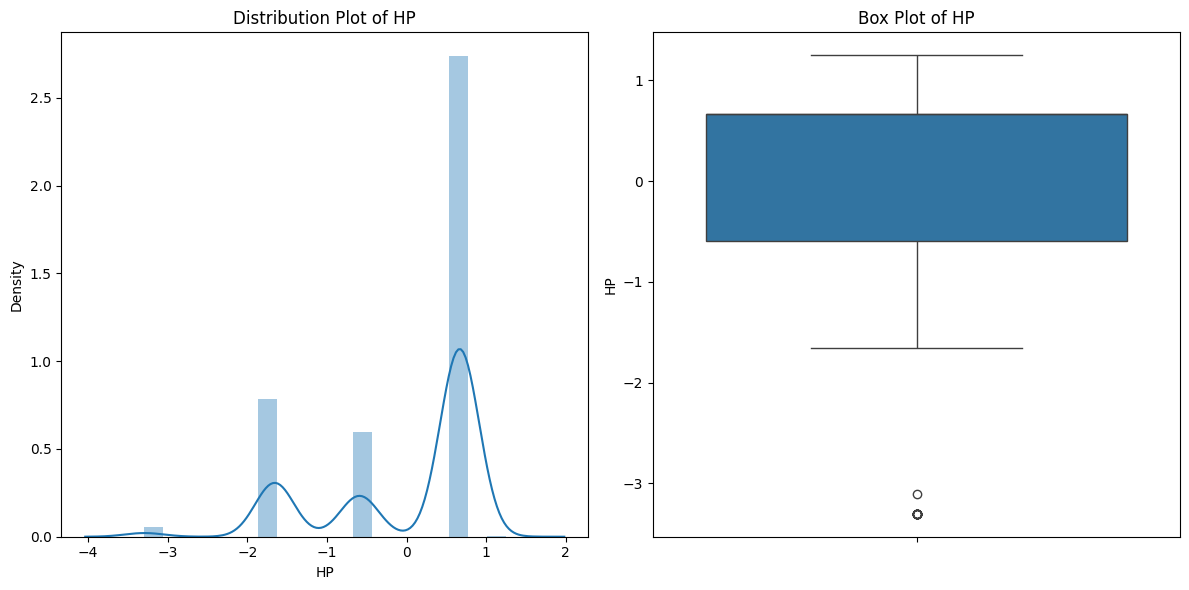

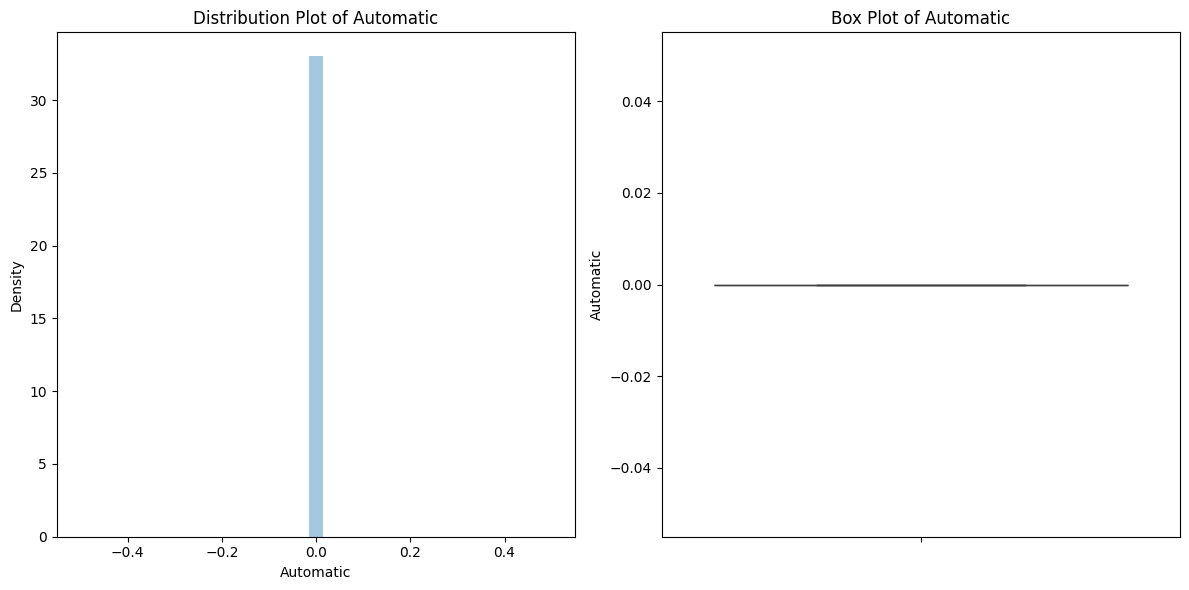

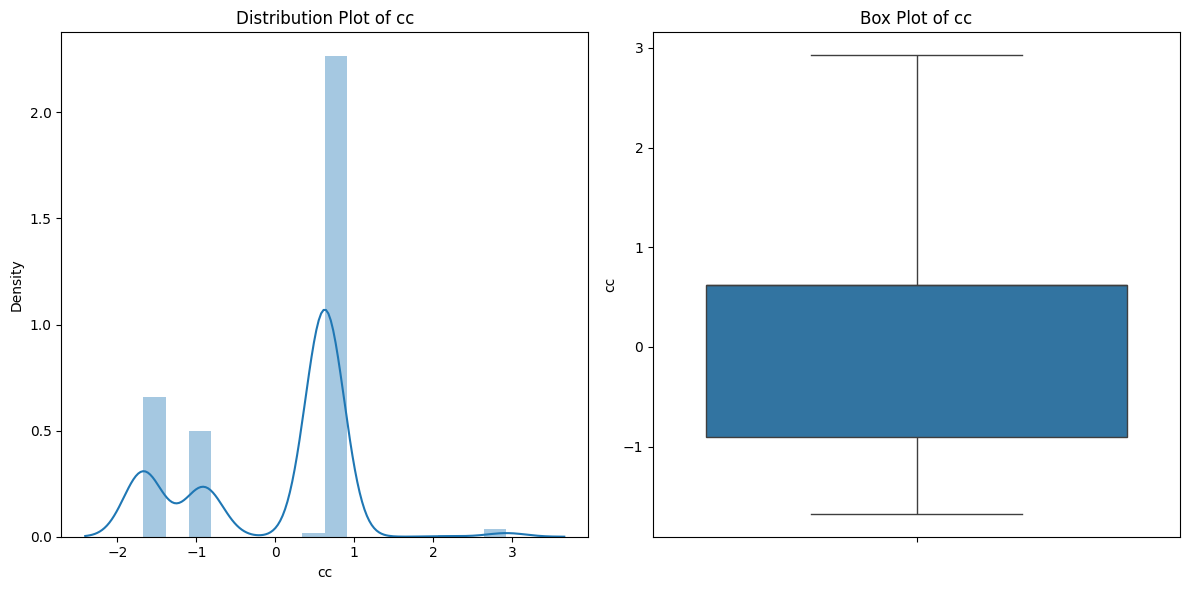

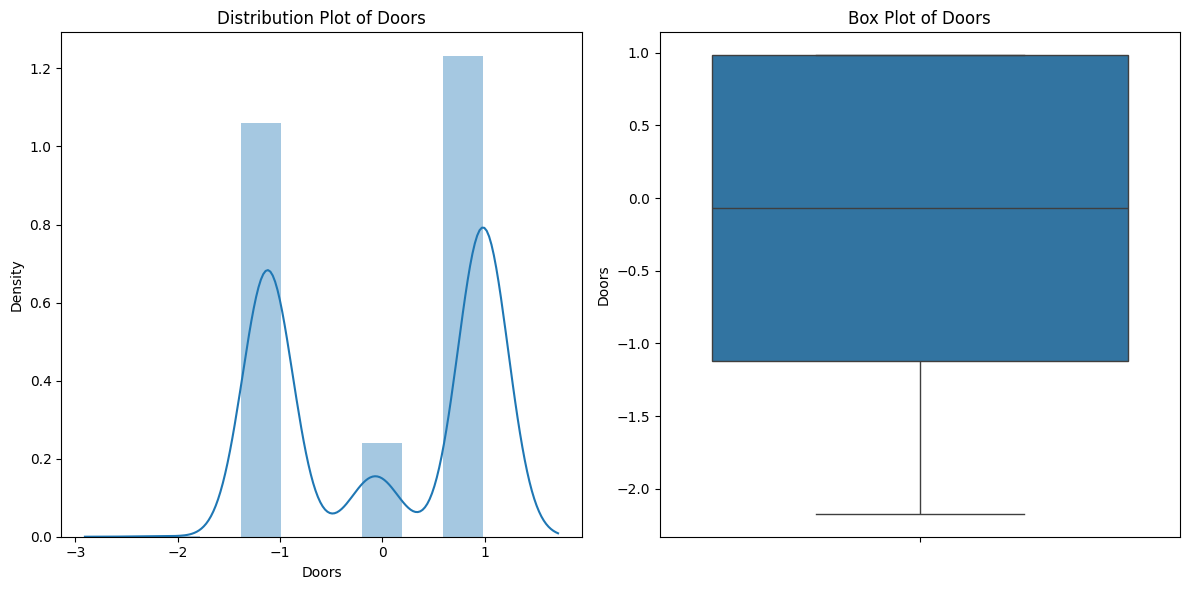

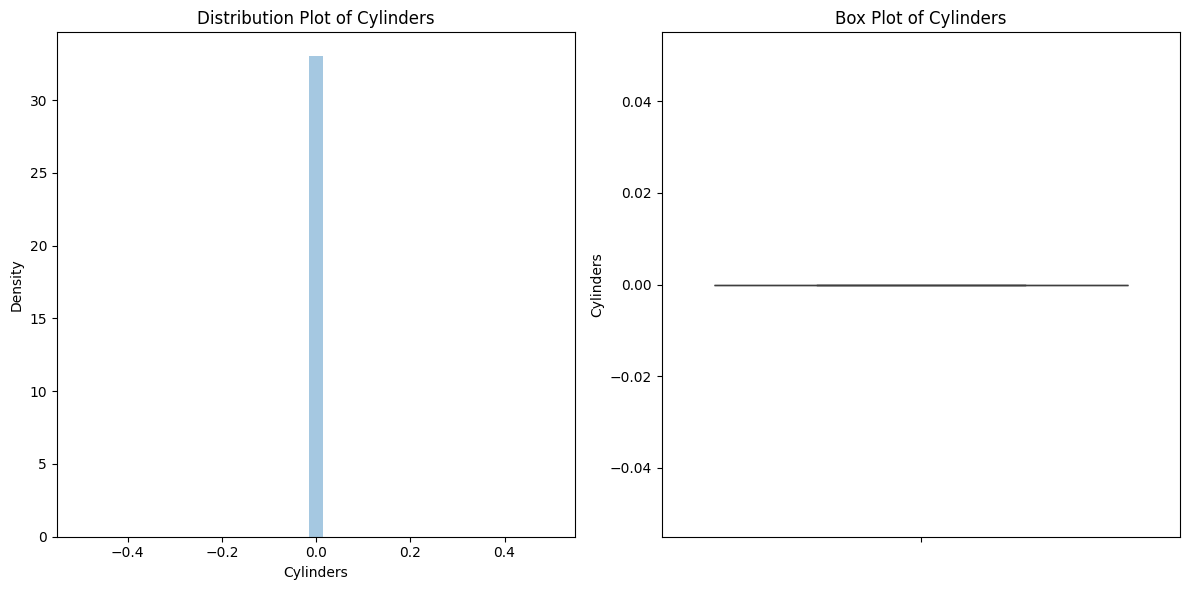

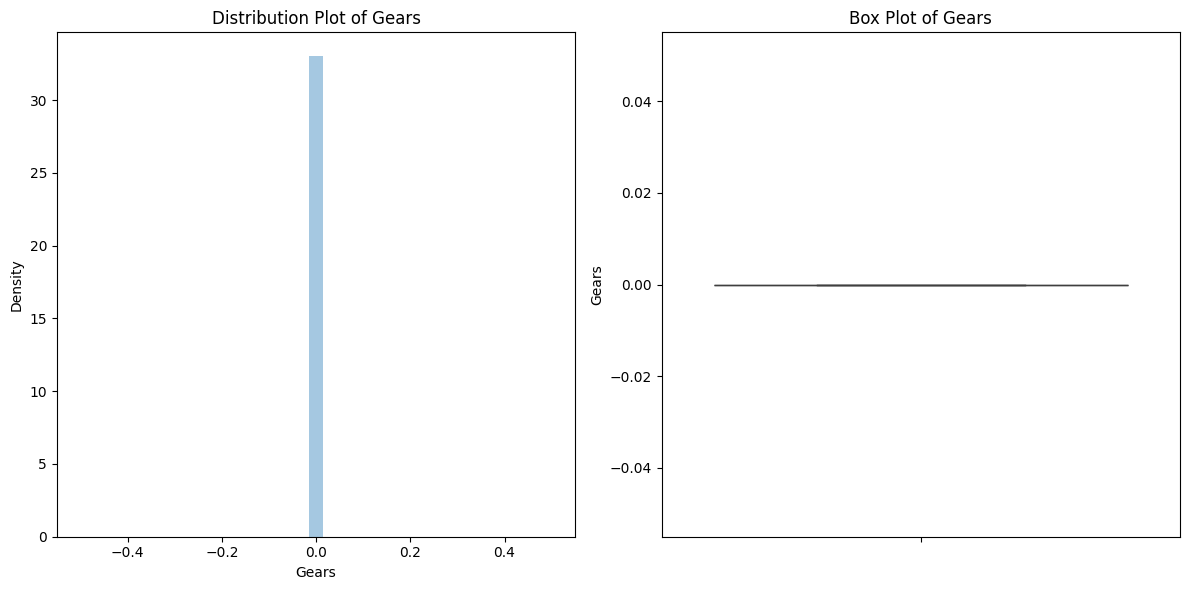

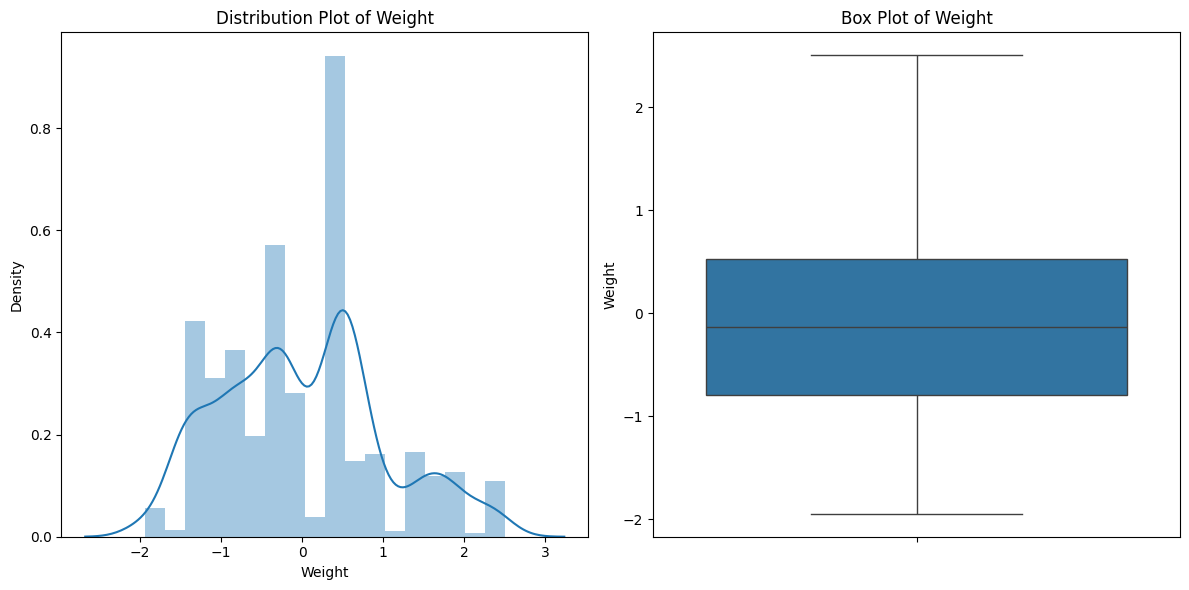

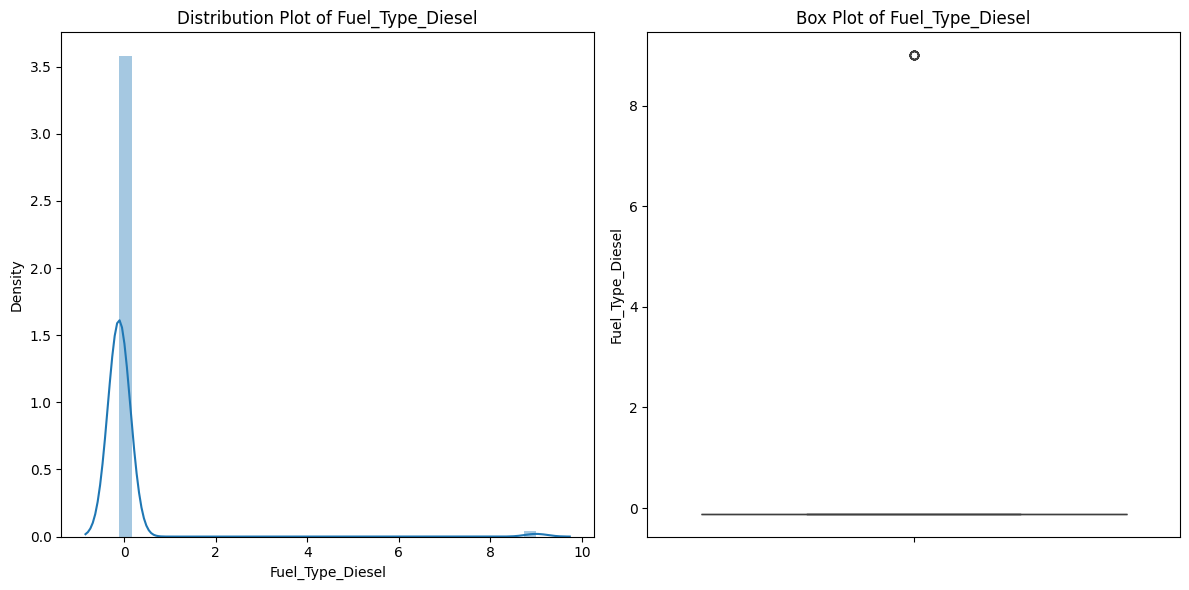

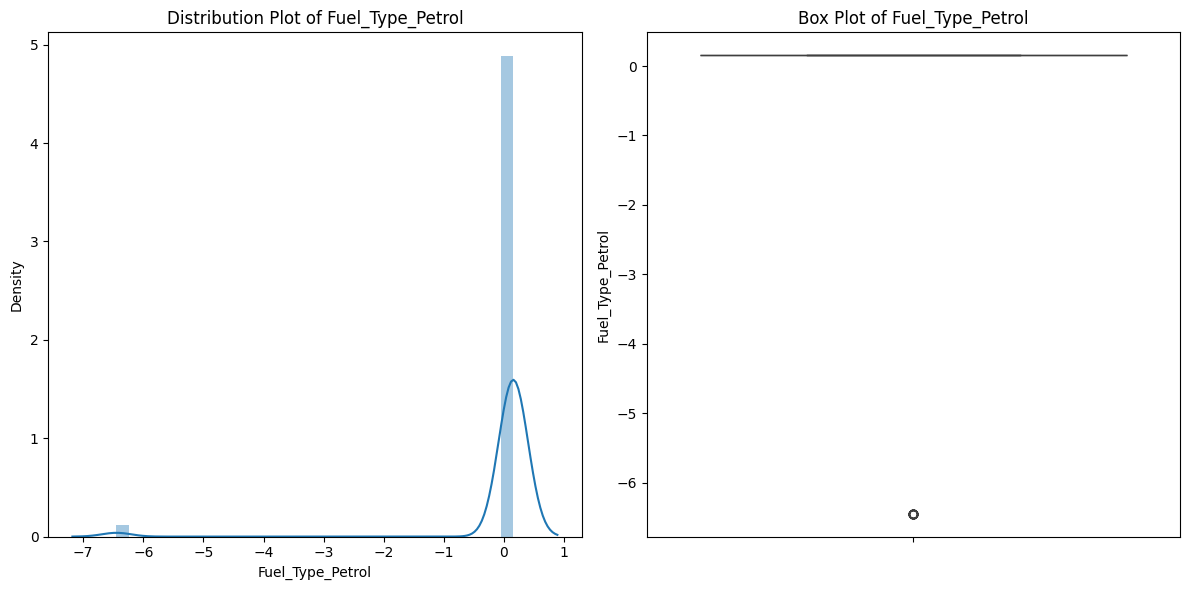

In [17]:
# distplot and boxplot
for col in dff.columns:
  plt.figure(figsize=(12, 6))  # Adjust figure size as needed

  plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
  sns.distplot(dff[col])
  plt.title(f'Distribution Plot of {col}')

  plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
  sns.boxplot(y=dff[col])
  plt.title(f'Box Plot of {col}')

  plt.tight_layout() # Adjust layout to prevent overlapping
  plt.show()

In [18]:
dff

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,12950,-1.854389,0.280954,-3.301986,0.0,2.926533,-1.120730,0.0,0.0,1.514368,9.003967,-6.446360
1,17950,-1.798877,-1.416608,0.667526,0.0,0.626406,-1.120730,0.0,0.0,1.514368,-0.111062,0.155126
2,16750,-1.798877,-1.284470,0.667526,0.0,0.626406,-1.120730,0.0,0.0,0.196354,-0.111062,0.155126
3,16950,-1.465809,0.048107,0.667526,0.0,0.626406,-1.120730,0.0,0.0,1.514368,-0.111062,0.155126
4,15950,-1.465809,0.161490,0.667526,0.0,0.626406,-1.120730,0.0,0.0,1.514368,-0.111062,0.155126
...,...,...,...,...,...,...,...,...,...,...,...,...
1144,7500,0.699134,-1.456864,-1.656091,0.0,-1.673721,-1.120730,0.0,0.0,-1.121659,-0.111062,0.155126
1145,10845,0.865668,-1.509898,-1.656091,0.0,-1.673721,-1.120730,0.0,0.0,-1.451163,-0.111062,0.155126
1146,8500,0.810157,-1.578045,-1.656091,0.0,-1.673721,-1.120730,0.0,0.0,-1.451163,-0.111062,0.155126
1147,7250,0.754645,-1.581480,-1.656091,0.0,-1.673721,-1.120730,0.0,0.0,-1.451163,-0.111062,0.155126


2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [19]:
#importing train test split
from sklearn.model_selection import train_test_split
# Separate features (X) and target variable (y)
X = dff.drop(columns=['Price'])  # All columns except 'Price'
y = dff['Price']  # Target variable

# Split the data into training and testing sets
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting splits
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (919, 11)
Shape of X_test: (230, 11)
Shape of y_train: (919,)
Shape of y_test: (230,)


Building Models

In [20]:
dff.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [21]:
#model
import statsmodels.formula.api as smf
model=smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Cylinders+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol',data=dff).fit()

In [22]:
#coefficients
model.params

,0
Intercept,1.054460e+04
Age_08_04,-2.165174e+03
KM,-4.533889e+02
HP,-2.008760e+03
Automatic,7.422773e-13
cc,1.838881e+03
Doors,-1.418863e+02
Cylinders,-5.260880e-13
Weight,9.519287e+02
Fuel_Type_Diesel,-1.503802e+03


In [23]:
#model residul
model.resid_pearson

array([-0.37805338,  1.12503905,  1.22713895, ..., -0.20207731,
       -1.4245767 , -3.39507272])

In [24]:
#model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     967.9
Date:                Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:18:44   Log-Likelihood:                -9695.2
No. Observations:                1149   AIC:                         1.941e+04
Df Residuals:                    1140   BIC:                         1.945e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.054e+04     33.103    318.540      0.000    1.05e+04    1.06e+04
Age_08_04        -2165.1737     50.302    -43.044      0.000   -2263.868   -2066.479
KM                -453.3889     42.927    -10.562      0.000    -537.613    -369.165
HP               -2008.7603    280.263     -7.167      0.000   -2558.649   -1458.871
Automatic         7.423e-13   5.24e-14     14.165      0.000    6.39e-13    8.45e-13
cc                1838.8810    274.379      6.702      0.000    1300.537    2377.225
Doors             -141.8863     40.256     -3.525      0.000    -220.870     -62.903
Cylinders        -5.261e-13   5.37e-14     -9.800      0.000   -6.31e-13   -4.21e-13
Weight             951.9287     57.296     16.614      0.000     839.511    1064.346
Fuel_Type_Diesel -1503.8015    194.251     -7.742      0.000   -1884.930   -1122.673
Fuel_Type_Petrol   175.7484     49.509      3.550      0.000      78.609     272.888
==============================================================================
Omnibus:                       65.139   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.969
Skew:                           0.258   Prob(JB):                     5.05e-40
Kurtosis:                       4.875   Cond. No.                     4.74e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.32e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [25]:
#r_sq and adj_r_sq values
r_squared = model.rsquared
adj_r_squared = model.rsquared_adj

print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adj_r_squared}")

R-squared: 0.871667060225742
Adjusted R-squared: 0.8707664781922384


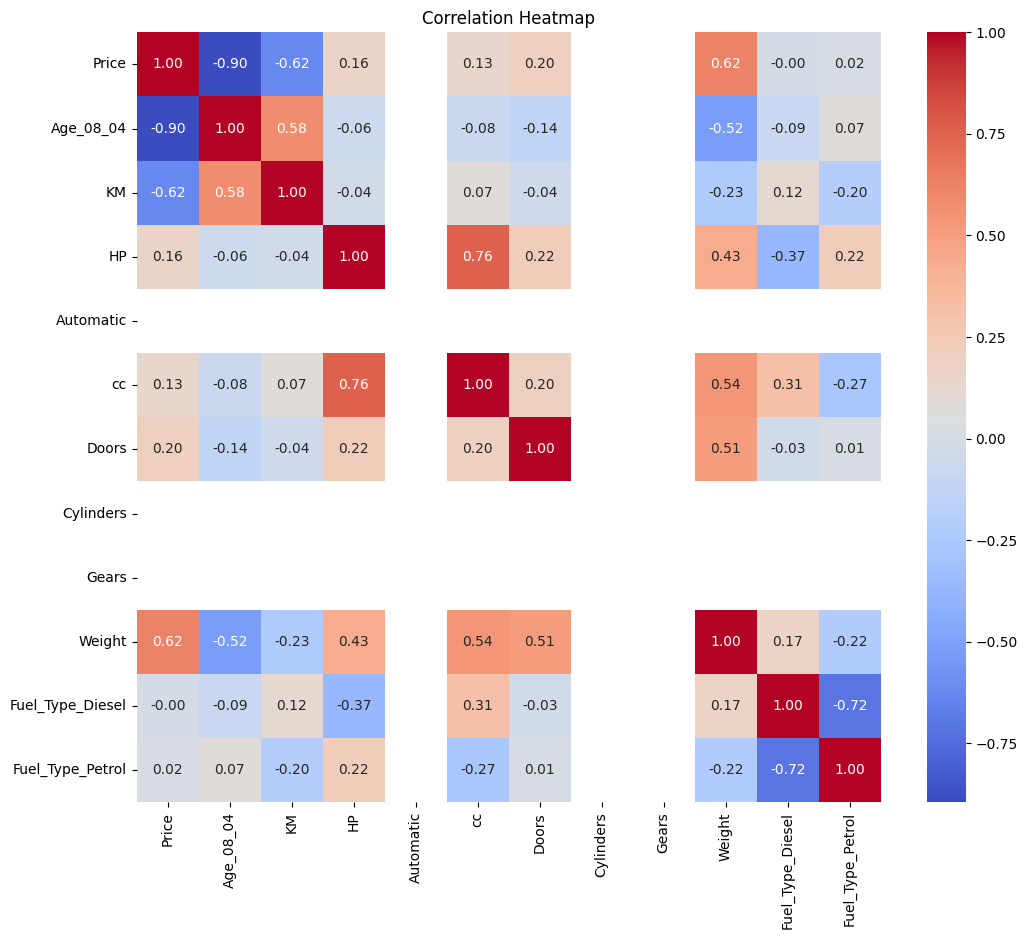

In [26]:
#Assuming 'dff' is your DataFrame as defined in the provided code.
plt.figure(figsize=(12, 10))
correlation_matrix = dff.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [27]:
#model2
#as there is no correlation removing automatic+Cylinders+Grears
import statsmodels.formula.api as smf
model2=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol',data=dff).fit()

In [28]:
model2.params

,0
Intercept,10544.602263
Age_08_04,-2165.173688
KM,-453.388903
HP,-2008.760310
cc,1838.880989
Doors,-141.886293
Weight,951.928677
Fuel_Type_Diesel,-1503.801518
Fuel_Type_Petrol,175.748412


In [29]:
#calculating residue
model2.resid_pearson

array([-0.37805338,  1.12503905,  1.22713895, ..., -0.20207731,
       -1.4245767 , -3.39507272])

In [30]:
#Model2 Summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     967.9
Date:                Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:18:45   Log-Likelihood:                -9695.2
No. Observations:                1149   AIC:                         1.941e+04
Df Residuals:                    1140   BIC:                         1.945e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.054e+04     33.103    318.540      0.000    1.05e+04    1.06e+04
Age_08_04        -2165.1737     50.302    -43.044      0.000   -2263.868   -2066.479
KM                -453.3889     42.927    -10.562      0.000    -537.613    -369.165
HP               -2008.7603    280.263     -7.167      0.000   -2558.649   -1458.871
cc                1838.8810    274.379      6.702      0.000    1300.537    2377.225
Doors             -141.8863     40.256     -3.525      0.000    -220.870     -62.903
Weight             951.9287     57.296     16.614      0.000     839.511    1064.346
Fuel_Type_Diesel -1503.8015    194.251     -7.742      0.000   -1884.930   -1122.673
Fuel_Type_Petrol   175.7484     49.509      3.550      0.000      78.609     272.888
==============================================================================
Omnibus:                       65.139   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.969
Skew:                           0.258   Prob(JB):                     5.05e-40
Kurtosis:                       4.875   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
'''we got the same r_sq and adj_r_sq values even after removing automatic+Cylinders+Grears'''
#r_sq and adj_r_sq values
r_squared = model2.rsquared
adj_r_squared = model2.rsquared_adj

print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adj_r_squared}")

R-squared: 0.871667060225742
Adjusted R-squared: 0.8707664781922384


In [32]:
#predicting the data
y_pred = model2.predict(X_test)
y_pred

,0
174,12760.056608
752,8776.931536
467,11567.500471
240,11485.333277
667,9480.721981
...,...
481,11546.583075
359,10451.479777
63,16926.390016
388,11269.011833


In [33]:
#calculating root mean square error
from sklearn.metrics import mean_squared_error
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE of Linear Regression: {rmse_lin}")

RMSE of Linear Regression: 1147.3020311931182


In [34]:
#This indicates that, on average, the model's predictions are off by about 11% of the typical car price in the dataset.
mean_price = y_test.mean()
print(f"Mean Price: {mean_price}")
print(f"Percentage of RMSE to Mean Price: {1147.3 / mean_price * 100:.2f}%")

Mean Price: 10453.252173913044
Percentage of RMSE to Mean Price: 10.98%


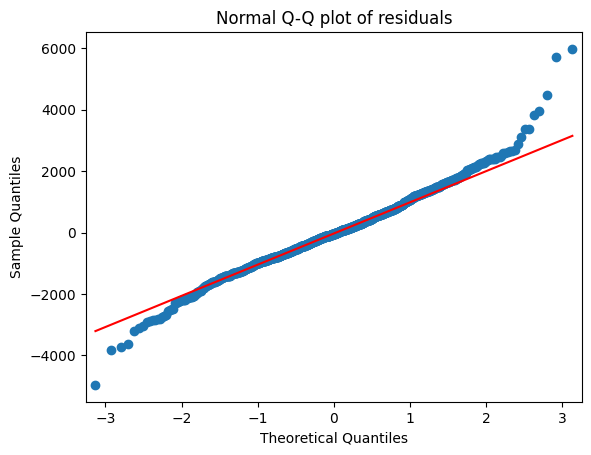

In [35]:
#Residual analysis
#plottong qq plot
import statsmodels.api as sm
qqplot=sm.qqplot(model2.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [36]:
list(np.where(model2.resid>10))

[array([   1,    2,    3,    4,    6,    9,   11,   12,   15,   18,   21,
          24,   26,   27,   34,   35,   36,   37,   38,   41,   43,   45,
          46,   47,   48,   49,   51,   53,   54,   57,   59,   62,   63,
          64,   67,   69,   70,   71,   73,   75,   77,   78,   80,   88,
          90,   92,   93,   94,   96,   97,   98,   99,  100,  101,  102,
         103,  104,  105,  106,  107,  108,  109,  110,  112,  113,  114,
         115,  116,  117,  118,  119,  120,  121,  122,  123,  124,  125,
         126,  127,  130,  134,  137,  144,  146,  150,  156,  157,  159,
         160,  164,  170,  172,  173,  179,  180,  181,  182,  184,  186,
         193,  195,  196,  197,  199,  201,  202,  211,  213,  216,  218,
         220,  221,  223,  224,  226,  229,  233,  234,  237,  258,  261,
         264,  265,  266,  267,  273,  275,  277,  278,  280,  285,  287,
         295,  300,  305,  306,  307,  309,  310,  312,  314,  316,  317,
         318,  320,  324,  327,  328, 

In [37]:
#Residual Plot for Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

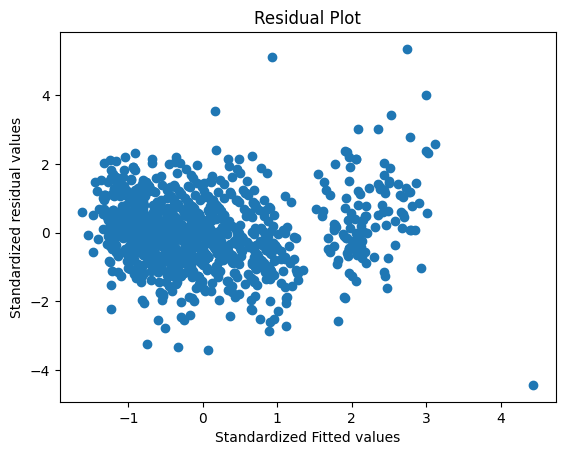

In [38]:
#scatter plot
plt.scatter(get_standardized_values(model2.fittedvalues),
            get_standardized_values(model2.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Influential observations (Cook's distance > 1): [66]


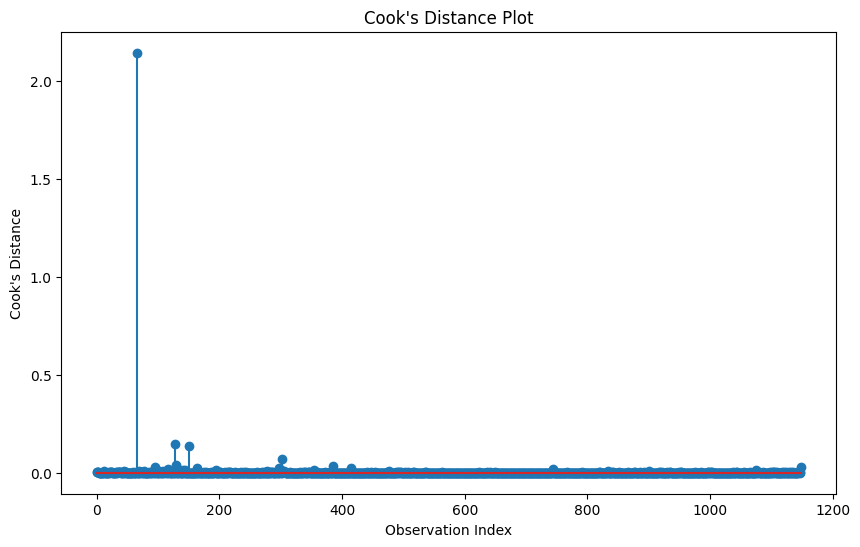

In [39]:
#Detecting Influencers/Outliers
#Cook’s Distance
from statsmodels.stats.outliers_influence import OLSInfluence

# Calculate Cook's distance for the model
influence = OLSInfluence(model2)
cooks_distance = influence.cooks_distance[0]

# Identify influential observations (e.g., Cook's distance > 1)
influential_obs = np.where(cooks_distance > 1)[0]

print("Influential observations (Cook's distance > 1):", influential_obs)

# Plot Cook's distance
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_distance)), cooks_distance)
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()

In [40]:
#index and value of influencer where c is more than .5
(np.argmax(cooks_distance),np.max(cooks_distance))

(66, 2.1419910004392744)

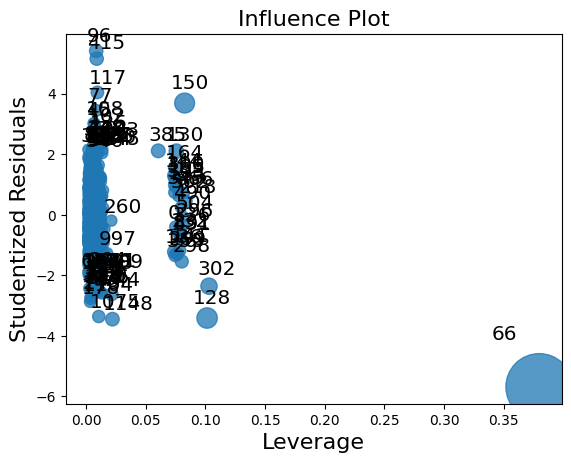

In [41]:
#influence plot
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model2)
plt.show()

In [42]:
#leverage cutoff
k = 8
n = dff.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.02349869451697128

In [43]:
# Get leverage values
influence = OLSInfluence(model2)
leverage = influence.hat_matrix_diag

# Filter observations based on leverage cutoff
dff_filtered = dff[leverage <= leverage_cutoff]

# Display the filtered DataFrame
df2=dff_filtered
df2
#or can just that one value

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
1,17950,-1.798877,-1.416608,0.667526,0.0,0.626406,-1.120730,0.0,0.0,1.514368,-0.111062,0.155126
2,16750,-1.798877,-1.284470,0.667526,0.0,0.626406,-1.120730,0.0,0.0,0.196354,-0.111062,0.155126
3,16950,-1.465809,0.048107,0.667526,0.0,0.626406,-1.120730,0.0,0.0,1.514368,-0.111062,0.155126
4,15950,-1.465809,0.161490,0.667526,0.0,0.626406,-1.120730,0.0,0.0,1.514368,-0.111062,0.155126
5,15950,-1.576832,-0.227023,0.667526,0.0,0.626406,-1.120730,0.0,0.0,2.008623,-0.111062,0.155126
...,...,...,...,...,...,...,...,...,...,...,...,...
1144,7500,0.699134,-1.456864,-1.656091,0.0,-1.673721,-1.120730,0.0,0.0,-1.121659,-0.111062,0.155126
1145,10845,0.865668,-1.509898,-1.656091,0.0,-1.673721,-1.120730,0.0,0.0,-1.451163,-0.111062,0.155126
1146,8500,0.810157,-1.578045,-1.656091,0.0,-1.673721,-1.120730,0.0,0.0,-1.451163,-0.111062,0.155126
1147,7250,0.754645,-1.581480,-1.656091,0.0,-1.673721,-1.120730,0.0,0.0,-1.451163,-0.111062,0.155126


In [44]:
df2.shape

(1120, 12)

In [45]:
# Resetting the index of the DataFrame 'df2'
df2.reset_index(drop=True, inplace=True)
df3=df2.copy()

In [46]:
#model3
model3=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol',data=df3).fit()

In [47]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     1339.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:18:49   Log-Likelihood:                -9421.3
No. Observations:                1120   AIC:                         1.886e+04
Df Residuals:                    1113   BIC:                         1.889e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.045e+04     42.291    247.154      0.000    1.04e+04    1.05e+04
Age_08_04        -2213.7210     50.415    -43.910      0.000   -2312.640   -2114.801
KM                -430.4121     42.536    -10.119      0.000    -513.872    -346.952
HP               -3186.8259    381.204     -8.360      0.000   -3934.785   -2438.867
cc                2945.7945    369.795      7.966      0.000    2220.220    3671.369
Doors             -166.2736     40.018     -4.155      0.000    -244.792     -87.755
Weight            1016.0397     56.712     17.916      0.000     904.764    1127.315
Fuel_Type_Diesel -1160.8625      4.697   -247.154      0.000   -1170.078   -1151.647
Fuel_Type_Petrol  1621.4372      6.560    247.154      0.000    1608.565    1634.309
==============================================================================
Omnibus:                       53.029   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.576
Skew:                           0.257   Prob(JB):                     1.46e-27
Kurtosis:                       4.544   Cond. No.                     1.84e+31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.57e-60. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [48]:
#### Accuracy has been increased ###
#r_sq and adj_r_sq values
r_squared = model3.rsquared
adj_r_squared = model3.rsquared_adj

print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adj_r_squared}")

R-squared: 0.8783432320843192
Adjusted R-squared: 0.8776874004513505


In [49]:
# Calculate VIF for each predictor variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df3, features):
    vif = pd.DataFrame()
    vif["Features"] = features
    vif["VIF"] = [variance_inflation_factor(df3[features].values, i) for i in range(df3[features].shape[1])]
    return vif

# Example usage:
features = ['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']
vif_data = calculate_vif(df3, features)
vif_data

,Features,VIF
0,Age_08_04,2.393923
1,KM,1.611304
2,HP,119.227140
3,cc,117.623709
4,Doors,1.503195
5,Weight,2.914963
6,Fuel_Type_Diesel,0.001332
7,Fuel_Type_Petrol,0.071924


In [50]:
''' As Hp and cc high VIF or colinerity ,We combine them '''
#creating a composite feature combining them if they are both conceptually important.
df4=df3.copy()
df4['HP_per_cc'] = df4['HP'] / df4['cc']
# Create the 'HP_per_cc' column in X_test
X_train['HP_per_cc'] = X_train['HP'] / X_train['cc']
X_test['HP_per_cc'] = X_test['HP'] / X_test['cc']
#dropping hp,cc,automatic,cylinders,gears columns from df4
df4 = df4.drop(columns=['HP', 'cc', 'Automatic', 'Cylinders', 'Gears'], axis=1)

In [51]:
df4.columns

Index(['Price', 'Age_08_04', 'KM', 'Doors', 'Weight', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'HP_per_cc'],
      dtype='object')

In [52]:
df4.head()

,Price,Age_08_04,KM,Doors,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol,HP_per_cc
0,17950,-1.798877,-1.416608,-1.12073,1.514368,-0.111062,0.155126,1.065644
1,16750,-1.798877,-1.284470,-1.12073,0.196354,-0.111062,0.155126,1.065644
2,16950,-1.465809,0.048107,-1.12073,1.514368,-0.111062,0.155126,1.065644
3,15950,-1.465809,0.161490,-1.12073,1.514368,-0.111062,0.155126,1.065644
4,15950,-1.576832,-0.227023,-1.12073,2.008623,-0.111062,0.155126,1.065644


# 1.Multi Linear Regression

In [53]:
#model4
model4=smf.ols('Price~Age_08_04+KM+HP_per_cc+Doors+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol',data=df4).fit()

In [54]:
#coeffients
model4.params

,0
Intercept,9078.387931
Age_08_04,-2211.832486
KM,-437.561941
HP_per_cc,1189.998836
Doors,-118.922251
Weight,815.477173
Fuel_Type_Diesel,-1008.265307
Fuel_Type_Petrol,1408.296793


In [74]:
#Model4 residue
model4.resid

,0
0,1306.171531
1,1238.800081
2,1683.765893
3,733.378304
4,-85.237901
...,...
1115,-1395.989271
1116,2562.853166
1117,65.252788
1118,-1309.031994


In [75]:
#pearson residue
model4.resid_pearson

array([ 1.16727875,  1.1070713 ,  1.50472132, ...,  0.05831408,
       -1.16983505, -3.24144988])

In [55]:
#model4 summary
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     1521.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:18:49   Log-Likelihood:                -9448.8
No. Observations:                1120   AIC:                         1.891e+04
Df Residuals:                    1114   BIC:                         1.894e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         9078.3879    248.093     36.593      0.000    8591.606    9565.170
Age_08_04        -2211.8325     51.466    -42.976      0.000   -2312.815   -2110.850
KM                -437.5619     43.521    -10.054      0.000    -522.955    -352.169
HP_per_cc         1189.9988    256.658      4.637      0.000     686.412    1693.586
Doors             -118.9223     40.363     -2.946      0.003    -198.118     -39.727
Weight             815.4772     49.368     16.518      0.000     718.613     912.341
Fuel_Type_Diesel -1008.2653     27.554    -36.593      0.000   -1062.328    -954.202
Fuel_Type_Petrol  1408.2968     38.486     36.593      0.000    1332.784    1483.809
==============================================================================
Omnibus:                       65.509   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.068
Skew:                           0.358   Prob(JB):                     8.58e-32
Kurtosis:                       4.598   Cond. No.                     5.03e+31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.31e-61. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
##r_sq and adj_r_sq values
r_squared = model4.rsquared
adj_r_squared = model4.rsquared_adj

print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adj_r_squared}")

R-squared: 0.8722265280168461
Adjusted R-squared: 0.8716530384657547


In [57]:
# Calculate VIF for each predictor variable in the final model (model4)
features = ['Age_08_04', 'KM', 'HP_per_cc', 'Doors', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']
vif_data = calculate_vif(df4, features)
vif_data

,Features,VIF
0,Age_08_04,2.377504
1,KM,1.607522
2,HP_per_cc,1.273264
3,Doors,1.457326
4,Weight,2.104982
5,Fuel_Type_Diesel,0.003898
6,Fuel_Type_Petrol,0.075042


In [58]:
# Assuming X_test and model4 are defined as in the provided code.
y_pred_model4 = model4.predict(X_test)
y_pred_model4

,0
174,12871.167892
752,8517.107701
467,11608.235077
240,11561.831508
667,9604.154154
...,...
481,11485.513055
359,10729.783352
63,16720.720766
388,11350.743557


In [59]:
# Calculate MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae_lin = mean_absolute_error(y_test, y_pred_model4)
print(f"MAE of Linear Regression: {mae_lin}")
print(f"Percentage of MAE to Mean Price: {mae_lin / mean_price * 100:.2f}%")


MAE of Linear Regression: 1278.2777632235322
Percentage of MAE to Mean Price: 12.23%


In [60]:
# RMSE and MAE
rmse = mean_squared_error(y_test, y_pred_model4, squared=False)
mae = mean_absolute_error(y_test, y_pred_model4)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 2681.89058861416
MAE: 1278.2777632235322


# 2. Lasso Regression

In [61]:
# As my VIF is < 5 for all, so we take moderate alpha value
# Import Lasso regression from sklearn
from sklearn.linear_model import Lasso

# Initialize and fit the Lasso Regression model
lasso_model = Lasso(alpha=10)  # Regularization parameter (smaller alpha allows more coefficients)
lasso_model.fit(X_train, y_train)

Lasso(alpha=10)

In [62]:
# Make predictions
lasso_pred = lasso_model.predict(X_test)

# Evaluate the model
lasso_mse = mean_squared_error(y_test, lasso_pred)
print("Lasso Regression MSE:", lasso_mse)

Lasso Regression MSE: 1499982.0428403371


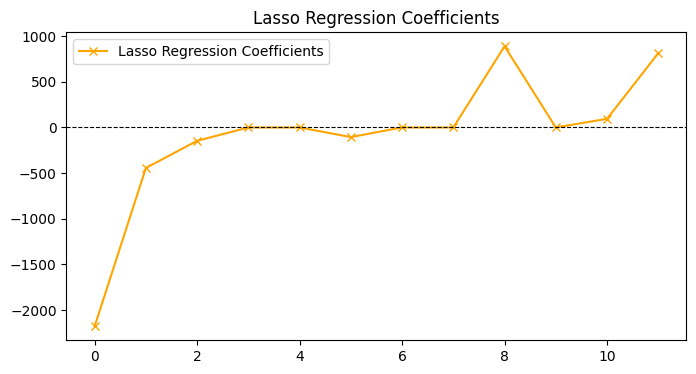

In [63]:
# Visualize the coefficients
plt.figure(figsize=(8, 4))
plt.plot(lasso_model.coef_, label="Lasso Regression Coefficients", marker='x', color='orange')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title("Lasso Regression Coefficients")
plt.legend()
plt.show()

In [64]:
''' Percentage of RMSE to Mean Price is reduced '''
#Square Root of MSE (RMSE)
rmse_l = np.sqrt(lasso_mse)
print(f"RMSE: {rmse_l}")
#Percentage of RMSE to Mean Price
percentage_error = (rmse_l / mean_price) * 100
print(f"Percentage of RMSE to Mean Price: {percentage_error:.5f}%")

RMSE: 1224.7375403899143
Percentage of RMSE to Mean Price: 11.71633%


# 3.Ridge Regression

In [65]:
# As my VIF is < 5 for all, so we take moderate alpha value
# Import ridge regression from sklearn
from sklearn.linear_model import Ridge

# Initialize and fit the Ridge Regression model
ridge_model = Ridge(alpha=10)  # Regularization parameter (try different values for alpha)
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [66]:
# Make predictions
ridge_pred = ridge_model.predict(X_test)

# Evaluate the model
ridge_mse = mean_squared_error(y_test, ridge_pred)
print("Ridge Regression MSE:", ridge_mse)

Ridge Regression MSE: 1472339.086133505


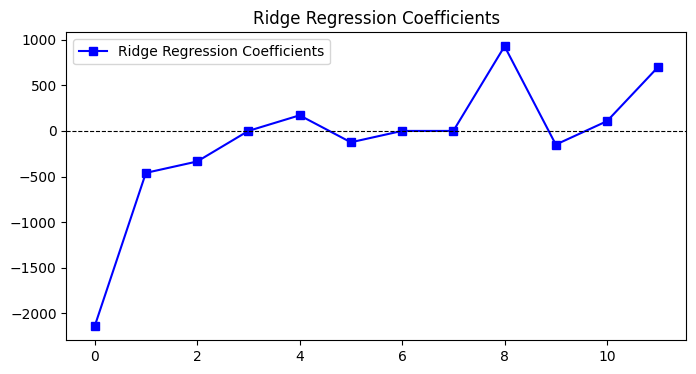

In [67]:
# Visualize the coefficients
plt.figure(figsize=(8, 4))
plt.plot(ridge_model.coef_, label="Ridge Regression Coefficients", marker='s', color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title("Ridge Regression Coefficients")
plt.legend()
plt.show()

In [68]:
#Square Root of MSE (RMSE)
rmse_r = np.sqrt(ridge_mse)
print(f"RMSE: {rmse_r}")
#Percentage of RMSE to Mean Price
percentage_error = (rmse_r / mean_price) * 100
print(f"Percentage of RMSE to Mean Price: {percentage_error:.5f}%")

RMSE: 1213.3998047360585
Percentage of RMSE to Mean Price: 11.60787%


# Conclusion

In [69]:
# Conclusion
'''
1.Price was the target variable.
2.The analysis began with multiple linear regression (MLR) on the Toyota Corolla dataset.
3.Exploratory data analysis (EDA) revealed the need for preprocessing, including outlier removal.
4.Dummy variable creation for categorical features, and standardization of numerical features.

5.Initial MLR models showed good performance, but residual analysis suggested the presence of influential observations.
6.After removing influential data points using Cook's distance and leverage analysis, model accuracy improved.

7.Feature engineering involved creating a 'HP_per_cc' feature to capture the relationship between horsepower and engine displacement.
8.This new model improved the R-squared value and reduced Multicollinearity as indicated by VIF.

9.Lasso and Ridge regressions were applied for regularization.
10.While they did not significantly enhance the model performance in terms of RMSE in this case,
Accuracy of MLR : 87.2%
Accuracy of Lasso : 88.3%
Accuracy of Ridge : 88.4%
11.They provide alternative modeling techniques for other datasets.
12.The final model provided reasonable predictive power.
   Further analysis and potentially more complex models could be considered for enhanced prediction accuracy.
'''

"\n1.Price was the target variable.\n2.The analysis began with multiple linear regression (MLR) on the Toyota Corolla dataset.\n3.Exploratory data analysis (EDA) revealed the need for preprocessing, including outlier removal.\n4.Dummy variable creation for categorical features, and standardization of numerical features.\n\n5.Initial MLR models showed good performance, but residual analysis suggested the presence of influential observations.\n6.After removing influential data points using Cook's distance and leverage analysis, model accuracy improved. \n\n7.Feature engineering involved creating a 'HP_per_cc' feature to capture the relationship between horsepower and engine displacement.\n8.This new model improved the R-squared value and reduced Multicollinearity as indicated by VIF.\n\n9.Lasso and Ridge regressions were applied for regularization.\n10.While they did not significantly enhance the model performance in terms of RMSE in this case,\nAccuracy of MLR : 87.2%\nAccuracy of Lasso

# Questions:

In [70]:
# Normalization & Standardization
'''
Normalization:
Definition:
Normalization is the process of scaling features so that they fall within a specific range,
typically between 0 and 1. It is often used when the data has different units or scales.

Advantages:
1.Equal Weighting: It ensures all features contribute equally to the model, especially when features have different ranges or units.
2.Improves Model Convergence: Normalization can speed up the convergence of gradient-based algorithms, as all features are on a similar scale.
'''

# Techniques can be used to address multicollinearity in multiple linear regression
'''
1.Remove Highly Correlated Variables:
Removing one of the highly correlated predictors to reduce redundancy and improve model stability.

2.Principal Component Analysis (PCA):
A dimensionality reduction technique that transforms correlated variables into a smaller set of uncorrelated components.

3.Ridge Regression (L2 Regularization):
Type of regression that adds a penalty to the size of the coefficients to prevent overfitting and reduce the impact of multicollinearity.

4.Variance Inflation Factor (VIF) Removal:
Method that identifies and removes predictors with high VIF values, indicating high multicollinearity.

5.Partial Least Squares Regression (PLS):
Regression technique that creates new components by combining features of PCA and linear regression to reduce multicollinearity.
'''

'\n1.Remove Highly Correlated Variables: \nRemoving one of the highly correlated predictors to reduce redundancy and improve model stability.\n\n2.Principal Component Analysis (PCA): \nA dimensionality reduction technique that transforms correlated variables into a smaller set of uncorrelated components.\n\n3.Ridge Regression (L2 Regularization): \nType of regression that adds a penalty to the size of the coefficients to prevent overfitting and reduce the impact of multicollinearity.\n\n4.Variance Inflation Factor (VIF) Removal:\nMethod that identifies and removes predictors with high VIF values, indicating high multicollinearity.\n\n5.Partial Least Squares Regression (PLS): \nRegression technique that creates new components by combining features of PCA and linear regression to reduce multicollinearity.\n'